In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# white grid background for visualization
sns.set_style("whitegrid")

In [3]:
%matplotlib inline

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf

In [5]:
# define a custom function to fetch data using yahoo finance

def custom_get_data_yf(*args,**kwargs):
    return yf.download(*args, **kwargs)

In [6]:
# override pandas_datareader with customer function
pdr.get_data_yahoo = custom_get_data_yf

In [7]:
# import datetime to set the start and end date of the graph
from datetime import datetime as dt

In [8]:
tech_list = ["NVDA", "INTC", "ORCL", "GOOG", "AMZN"]

In [9]:
end = dt.now()

In [10]:
end

datetime.datetime(2025, 4, 30, 11, 52, 18, 900478)

In [11]:
start = dt(end.year - 1, end.month, end.day) #1 year ago from today

In [12]:
start

datetime.datetime(2024, 4, 30, 0, 0)

In [13]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start,end, auto_adjust = False) # to get adjusted closing price

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-04-30,86.373611,86.402000,88.819000,86.300003,87.239998,363709000
2024-05-01,83.013718,83.041000,86.000000,81.254997,85.077003,559863000
2024-05-02,85.788811,85.817001,86.237000,83.199997,84.448997,377898000
2024-05-03,88.759834,88.789001,89.280998,87.040001,87.789001,398341000
2024-05-06,92.109726,92.139999,92.220001,89.055000,89.389999,376203000


In [15]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-30 to 2025-04-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  250 non-null    float64
 1   (Close, NVDA)      250 non-null    float64
 2   (High, NVDA)       250 non-null    float64
 3   (Low, NVDA)        250 non-null    float64
 4   (Open, NVDA)       250 non-null    float64
 5   (Volume, NVDA)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


# Data Info

In [16]:
NVDA["Adj Close"].plot(legend = True, figsize = (10,4))

<Axes: xlabel='Date'>

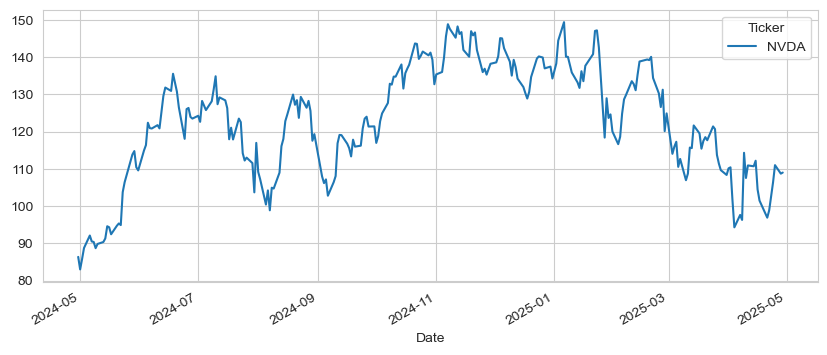

In [17]:
plt.show()

In [18]:
# plot the total volumne of stocks trading

In [19]:
NVDA["Volume"].plot(legend = True, figsize = (10,4))

<Axes: xlabel='Date'>

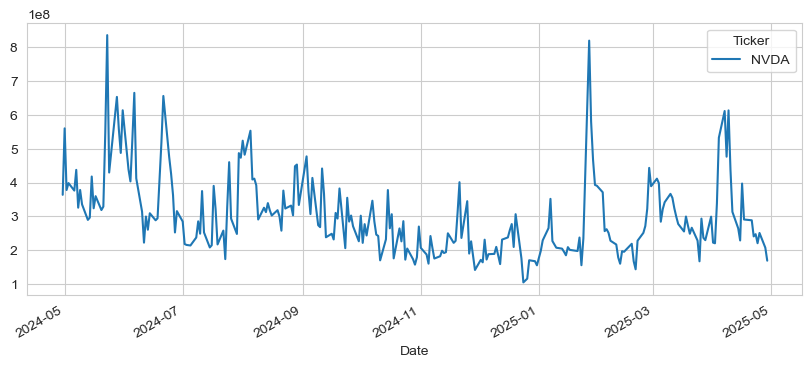

In [20]:
plt.show()

# Moving Average and Dayly Return Analysis

In [21]:
MA_day = [10,20,50]

In [22]:
for MA in MA_day:
    # create a columne's name and label it
    column_name = f"MA_of_{str(MA)}"
    
    # create a new colume here in NVDA dataframe
    NVDA[column_name] = NVDA["Adj Close"].rolling(MA).mean()

In [23]:
NVDA[["Adj Close", "MA_of_10", "MA_of_20", "MA_of_50"]].plot(subplots = False,figsize = (10,4))
                                                                                                                   

<Axes: xlabel='Date'>

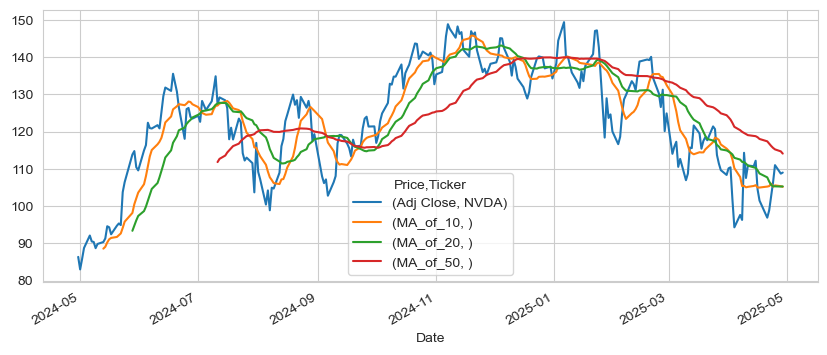

In [24]:
plt.show()

In [25]:
# we notice that you will get smoother line for our moving average if you get more days to calculate

In [26]:
# Daily Return

In [27]:
# remember periods = 1 to calculate the daily return rate

In [28]:
NVDA["Daily Return Rate"] = NVDA["Adj Close"].pct_change(periods = 1) 

In [29]:
NVDA["Daily Return Rate"]

Date
2024-04-30         NaN
2024-05-01   -0.038900
2024-05-02    0.033429
2024-05-03    0.034632
2024-05-06    0.037741
                ...   
2025-04-23    0.038629
2025-04-24    0.036218
2025-04-25    0.043033
2025-04-28   -0.020539
2025-04-29    0.002667
Name: Daily Return Rate, Length: 250, dtype: float64

In [30]:
NVDA.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,MA_of_10,MA_of_20,MA_of_50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-04-30,86.373611,86.402000,88.819000,86.300003,87.239998,363709000,NaN,NaN,NaN,NaN
2024-05-01,83.013718,83.041000,86.000000,81.254997,85.077003,559863000,NaN,NaN,NaN,-0.038900
2024-05-02,85.788811,85.817001,86.237000,83.199997,84.448997,377898000,NaN,NaN,NaN,0.033429
2024-05-03,88.759834,88.789001,89.280998,87.040001,87.789001,398341000,NaN,NaN,NaN,0.034632
2024-05-06,92.109726,92.139999,92.220001,89.055000,89.389999,376203000,NaN,NaN,NaN,0.037741
2024-05-07,90.524246,90.554001,91.780998,89.011002,91.098000,437342000,NaN,NaN,NaN,-0.017213
2024-05-08,90.382301,90.412003,91.194000,89.419998,89.483002,325721000,NaN,NaN,NaN,-0.001568
2024-05-09,88.717850,88.747002,91.071999,88.231003,90.528999,378013000,NaN,NaN,NaN,-0.018416


In [31]:
NVDA["Daily Return Rate"].plot(figsize = (20,8), legend = True, marker = "o")

<Axes: xlabel='Date'>

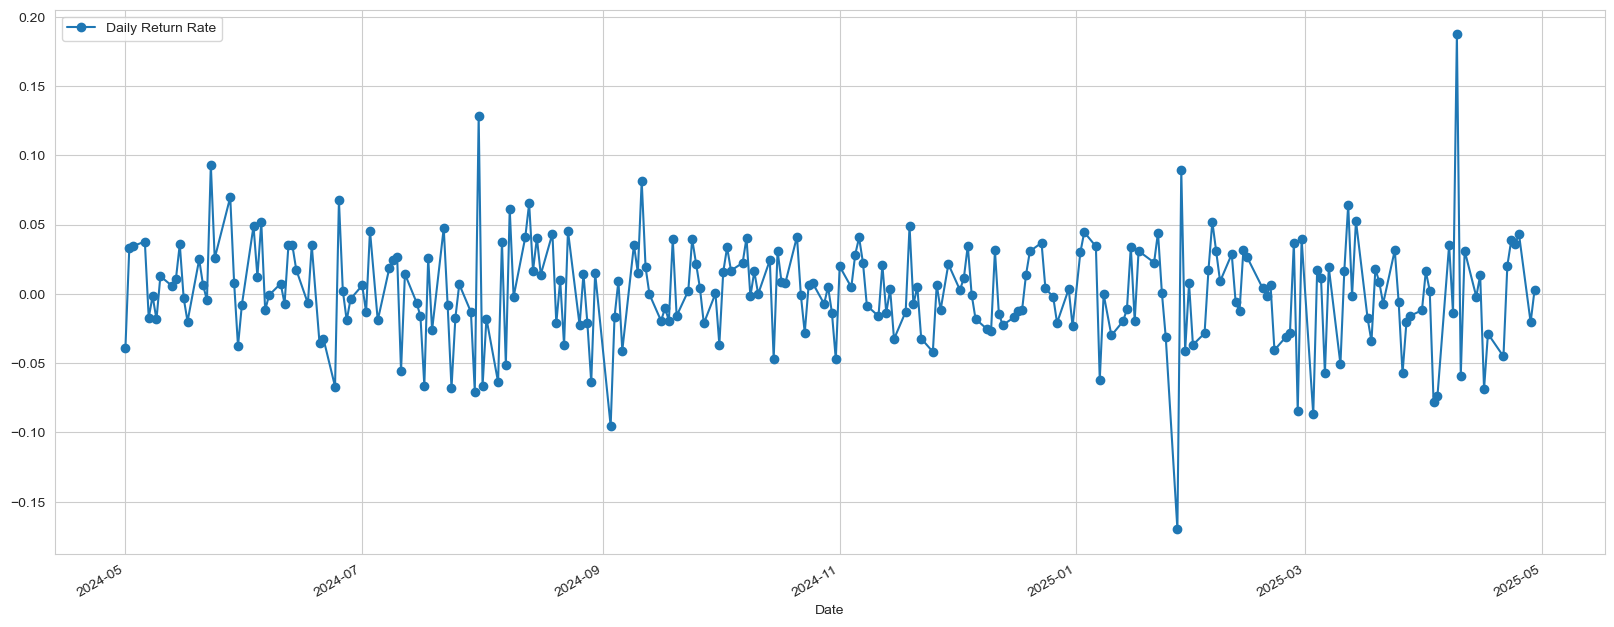

In [32]:
plt.show()

In [33]:
sns.lmplot(data = NVDA, y = "Adj Close", x = "Volume")

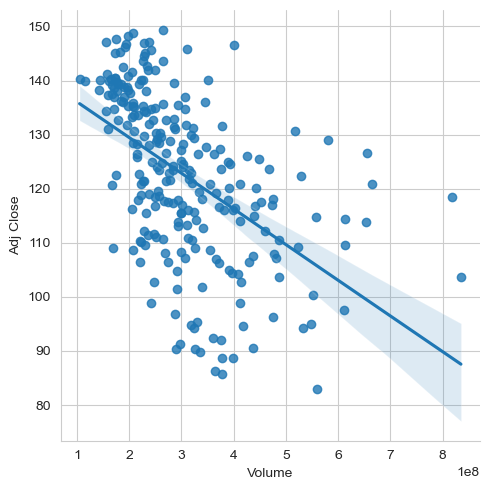

In [34]:
plt.show()

In [35]:
# we can notice that there is a negative relationship between Adj Price and Volume of stock trade during 1 year period

# The more the price went down, the more shares has been traded 

In [36]:
# look at average daily return with histogram

In [37]:
# Distplot ( histogram and KDE plots)

In [38]:
sns.displot(data = NVDA["Daily Return Rate"].dropna(), bins = 50, color = "purple", kde = True)

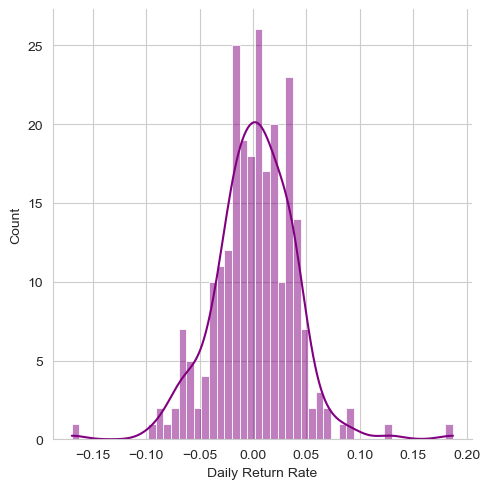

In [39]:
plt.show()

In [40]:
# This graph shows the distribution of daily return of NVDA, we can see that it was coming from - 0.1 to 0.1 percents

In [41]:
# Analyse the return of all the stock in the list

In [42]:
# create a dataframe with "adj close" of each stock 

In [43]:
stocks_df = pdr.get_data_yahoo(tech_list, start, end, auto_adjust = False)["Adj Close"]

[*********************100%***********************]  5 of 5 completed


In [44]:
stocks_df.head(10)

Ticker,AMZN,GOOG,INTC,NVDA,ORCL
Date,,,,,
2024-04-30,175.000000,163.863876,30.155445,86.373619,112.493660
2024-05-01,179.000000,164.789490,30.056479,83.013718,113.363937
2024-05-02,184.720001,167.665878,30.195032,85.788811,113.690300
2024-05-03,186.210007,168.193359,30.581007,88.759834,114.521019
2024-05-06,188.699997,169.029388,30.774776,92.109734,117.032959
2024-05-07,188.759995,172.164536,30.486605,90.524254,116.627487
2024-05-08,188.000000,170.353134,29.810892,90.382301,116.093452
2024-05-09,189.500000,170.771149,29.900324,88.717850,115.351738
2024-05-10,187.479996,169.487213,29.661839,89.848465,115.381401


In [45]:
tech_returns = stocks_df.pct_change(periods = 1)

In [46]:
tech_returns.head()

Ticker,AMZN,GOOG,INTC,NVDA,ORCL
Date,,,,,
2024-04-30,NaN,NaN,NaN,NaN,NaN
2024-05-01,0.022857,0.005649,-0.003282,-0.038900,0.007736
2024-05-02,0.031955,0.017455,0.004610,0.033429,0.002879
2024-05-03,0.008066,0.003146,0.012783,0.034632,0.007307
2024-05-06,0.013372,0.004971,0.006336,0.037741,0.021934


In [47]:
# Compare daily return percentages of 2 stocks, check their correlation, using jointplot

In [48]:
sns.jointplot(data = tech_returns, x = "NVDA", y = "ORCL", kind ="reg", color = "green")

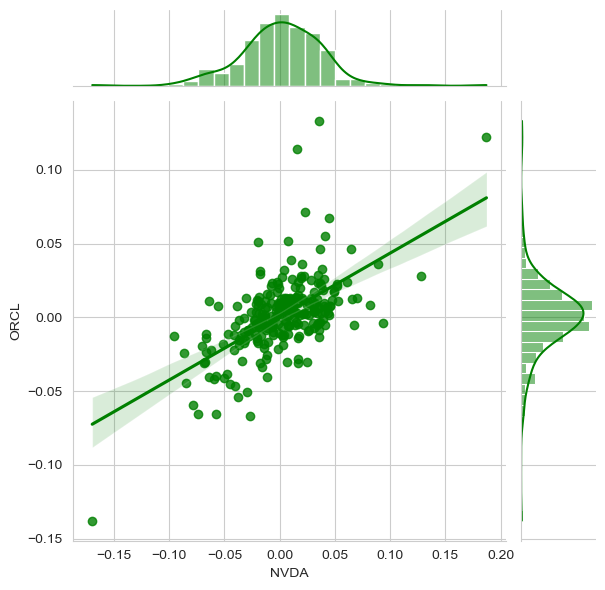

In [49]:
plt.show()

In [50]:
sns.jointplot(data = tech_returns, x = "GOOG", y = "AMZN", kind ="reg", color = "blue")

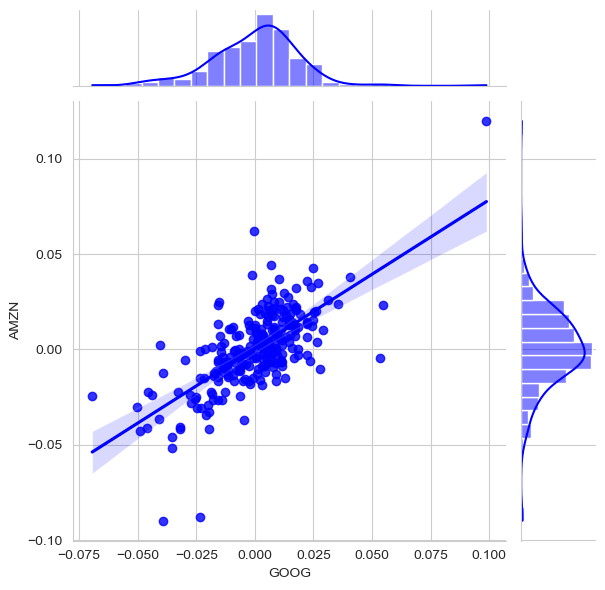

In [51]:
plt.show()

In [52]:
# Seaborn to repeat comparison analysis for every possible combination of stocks

In [53]:
tech_returns.head(10)

Ticker,AMZN,GOOG,INTC,NVDA,ORCL
Date,,,,,
2024-04-30,NaN,NaN,NaN,NaN,NaN
2024-05-01,0.022857,0.005649,-0.003282,-0.038900,0.007736
2024-05-02,0.031955,0.017455,0.004610,0.033429,0.002879
2024-05-03,0.008066,0.003146,0.012783,0.034632,0.007307
2024-05-06,0.013372,0.004971,0.006336,0.037741,0.021934
2024-05-07,0.000318,0.018548,-0.009364,-0.017213,-0.003465
2024-05-08,-0.004026,-0.010521,-0.022164,-0.001568,-0.004579
2024-05-09,0.007979,0.002454,0.003000,-0.018416,-0.006389
2024-05-10,-0.010660,-0.007518,-0.007976,0.012744,0.000257


In [54]:
# pairplot

In [55]:
sns.pairplot(tech_returns.dropna())

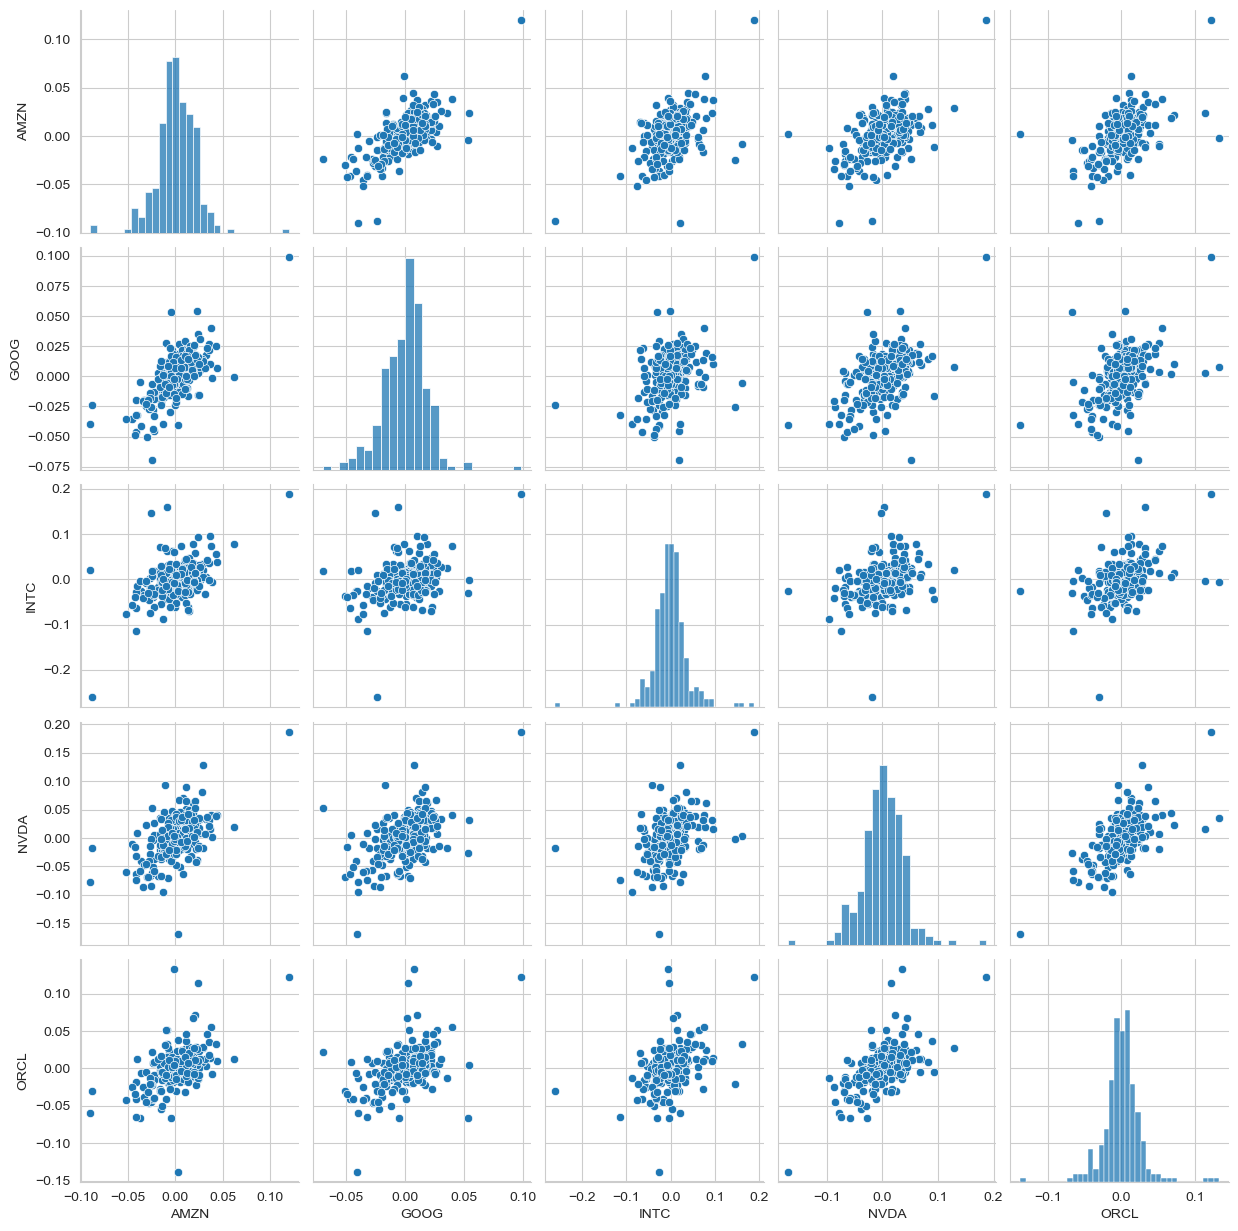

In [56]:
plt.show()

In [57]:
# more control of the figure

In [58]:
return_fig = sns.PairGrid(tech_returns.dropna())

In [59]:
# pass 3 method, mapp_upper, map_lower, map_diagonal
return_fig.map_upper(plt.scatter, color = "purple")

return_fig.map_lower(sns.kdeplot, cmap = "cool_d")

return_fig.map_diag(plt.hist, bins = 30)

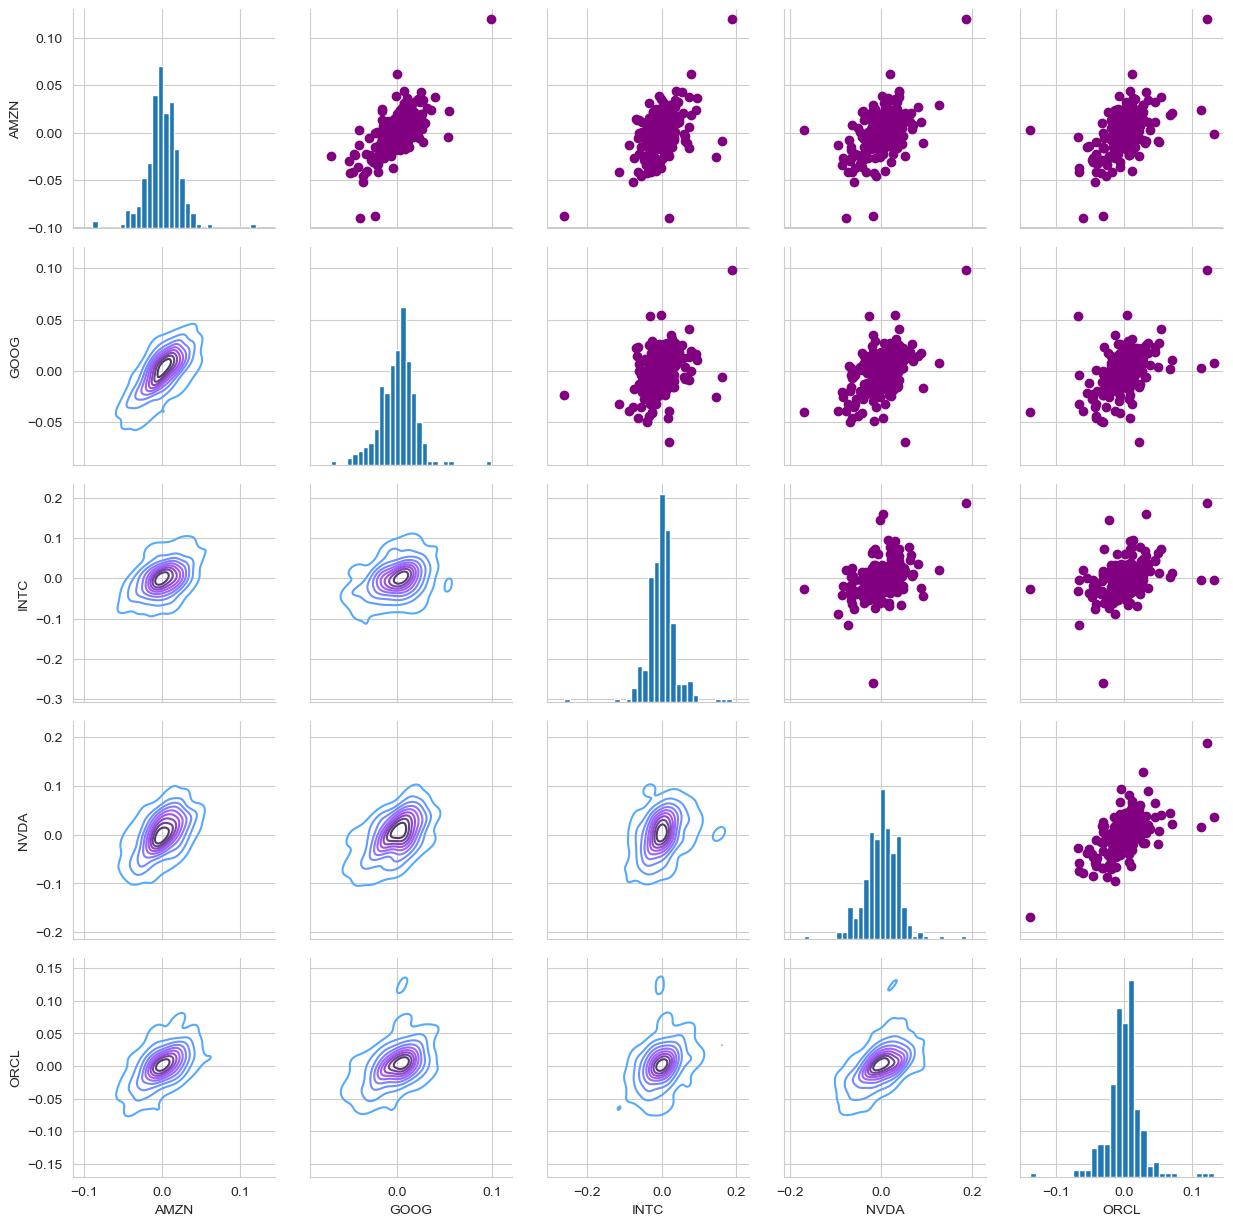

In [60]:
plt.show()

In [61]:
return_fig = sns.PairGrid(stocks_df.dropna())

return_fig.map_upper(plt.scatter, color = "purple")

return_fig.map_lower(sns.kdeplot, cmap = "cool_d")

return_fig.map_diag(plt.hist, bins = 30)

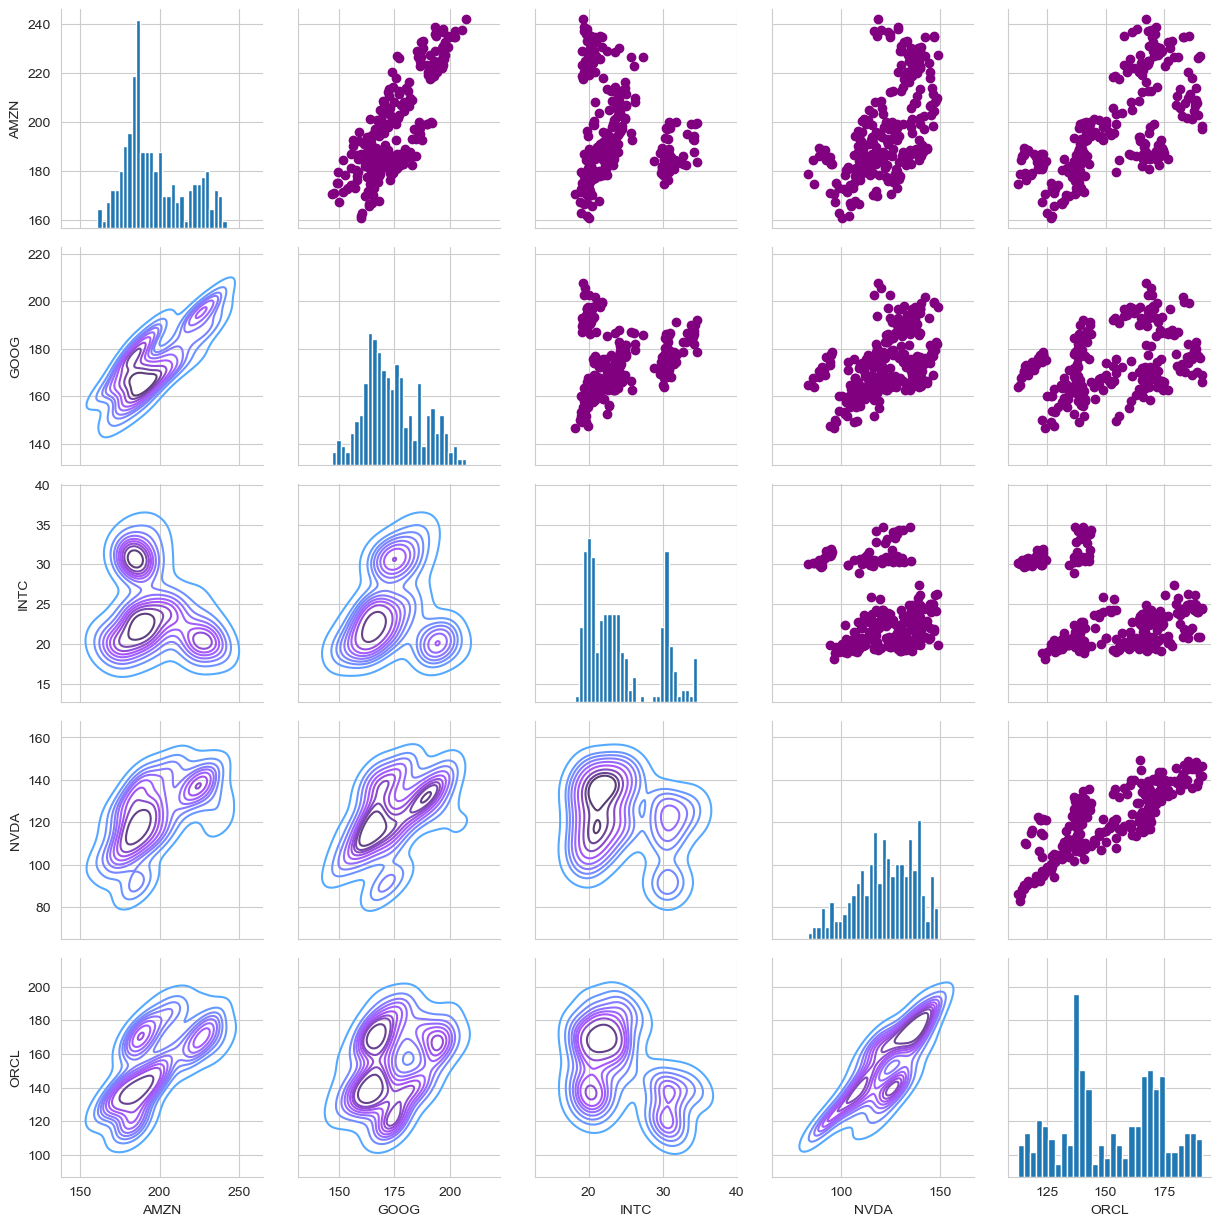

In [62]:
plt.show()

In [63]:
# Correlation plot for daily return

In [64]:
sns.heatmap(data = stocks_df.dropna().corr(), annot = True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

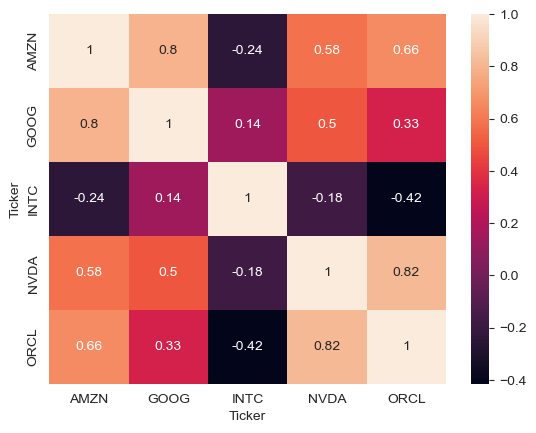

In [65]:
plt.show()

In [66]:

# use stocks_df with corr method
sns.heatmap(stocks_df.dropna().corr(), cmap = "tab20", vmin = 0, vmax = 1, center = 0,
           square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .8})

<Axes: xlabel='Ticker', ylabel='Ticker'>

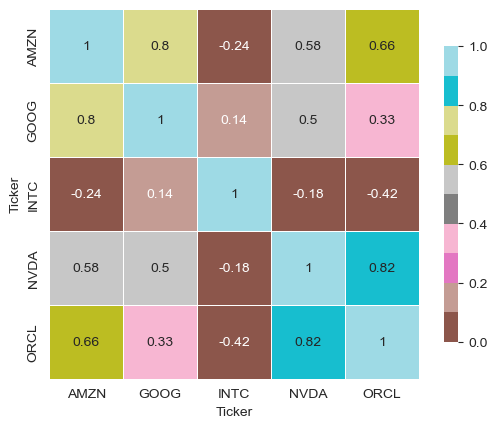

In [67]:
plt.show()

# Risk Analysis

In [68]:
# Quantify risk by comparing expected return with the std of daily returns, given we gathered on daily percentage returns data

In [69]:
# define a new dataframe

In [70]:
myreturns = tech_returns.dropna()

In [71]:
myreturns.mean()

Ticker
AMZN    0.000497
GOOG    0.000131
INTC   -0.000786
NVDA    0.001647
ORCL    0.001252
dtype: float64

In [72]:
myreturns.std()

Ticker
AMZN    0.021146
GOOG    0.018754
INTC    0.039579
NVDA    0.037765
ORCL    0.026604
dtype: float64

In [73]:
# define the area of these circles for the scatter plot

In [74]:
area = np.pi * 25

In [75]:
plt.scatter(x = myreturns.mean(), y = myreturns.std(), s= area)

plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x ,y in zip(myreturns.columns, myreturns.mean(), myreturns.std()):
    plt.annotate(label,
                 xy = (x,y), xytext = (50,50),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3', color = "green"))

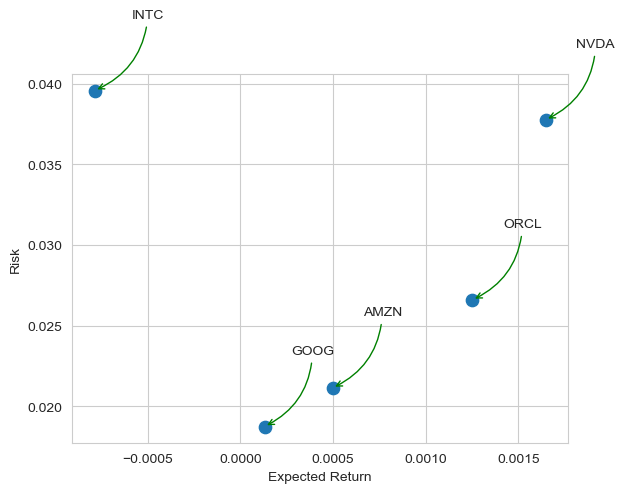

In [76]:
plt.show()

# Value at Risk

In [77]:
# define value at risk parameter for our stocks.

In [78]:
# the money we expected to lose/ putting at risk, for a given confidence interval

In [79]:
# Value at risk using the "bootstrap" method
sns.displot(data = NVDA["Daily Return Rate"].dropna(), bins = 100, color = "purple", kde = True)

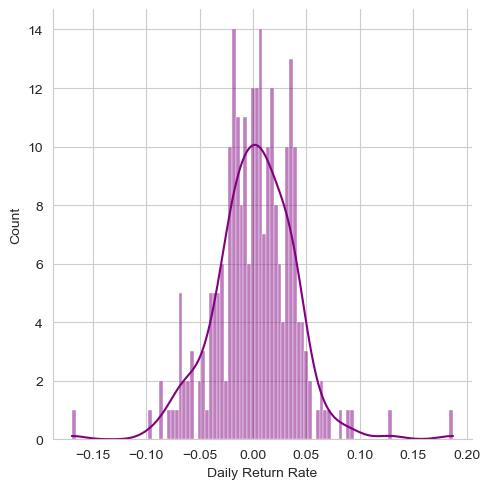

In [80]:
plt.show()

In [81]:
# use quantile to get the risk value of stocks

In [82]:
tech_returns.quantile(0.05)

Ticker
AMZN   -0.031965
GOOG   -0.032434
INTC   -0.055455
NVDA   -0.063740
ORCL   -0.040516
Name: 0.05, dtype: float64

In [83]:
# This is the 0.05 empirical quantile of daily return

# this means with 95% confidence that your worst daily loss would not exceed (n*100%)% 

# So everyday, at worst you would lose n% , 95% of the times

# So if you have $1 mill investment in AMZN, your 5% variance at worst would be $30,000, equilvalent to 5% = - 0,03

# Value at Risk using Monte Carlo Method

In [84]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA_of_10,MA_of_20,MA_of_50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-04-30,86.373611,86.402000,88.819000,86.300003,87.239998,363709000,NaN,NaN,NaN,NaN
2024-05-01,83.013718,83.041000,86.000000,81.254997,85.077003,559863000,NaN,NaN,NaN,-0.038900
2024-05-02,85.788811,85.817001,86.237000,83.199997,84.448997,377898000,NaN,NaN,NaN,0.033429
2024-05-03,88.759834,88.789001,89.280998,87.040001,87.789001,398341000,NaN,NaN,NaN,0.034632
2024-05-06,92.109726,92.139999,92.220001,89.055000,89.389999,376203000,NaN,NaN,NaN,0.037741


In [85]:
# set up the time horizon
days = 365
# set up delta
dt = 1/days
# set up and grab our "drift" from the expected return data for NVDA

mu = tech_returns.mean()["NVDA"]

# grab the volatility of the stock from the std of average return

sigma = tech_returns.std()["NVDA"]

In [86]:
# tech_returns.dropna()

In [87]:
# tech_returns.mean()

In [88]:
# creat a function that take in - inital stock price, the number of days you run for, your mu and your sigma

# mu is your average daily returns

# sigma is your std on those returns

def monte_carlo(start_price, days, mu, sigma):
    # Create 3 arrays - Price, Shock and Drift
    
    # 1: define a price array full of zeros with the length = numbers of the days
    price = np.zeros(days)
    # set the first term of price = starting price
    price[0] = start_price
    
    # 2:  make a shock & drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # 3: calculate the shock term for everyday
    for x in range(1,days):
        # Jose set epsilon equal a normal distribution defined by sigma*np.sqrt(dt) // based off the information from NVDA stock
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        # price of stock = previous stock's price + Delta X_value /// current drift value + current shock value
        
        price[x] = price[x-1] +( price[x-1] * (drift[x] + shock[x]))
    
    return price

In [89]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA_of_10,MA_of_20,MA_of_50,Daily Return Rate
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-04-30,86.373611,86.402000,88.819000,86.300003,87.239998,363709000,NaN,NaN,NaN,NaN
2024-05-01,83.013718,83.041000,86.000000,81.254997,85.077003,559863000,NaN,NaN,NaN,-0.038900
2024-05-02,85.788811,85.817001,86.237000,83.199997,84.448997,377898000,NaN,NaN,NaN,0.033429
2024-05-03,88.759834,88.789001,89.280998,87.040001,87.789001,398341000,NaN,NaN,NaN,0.034632
2024-05-06,92.109726,92.139999,92.220001,89.055000,89.389999,376203000,NaN,NaN,NaN,0.037741


In [90]:
start_price = 87.24
# I will run this monte carlo simulation 10000 times
for run in range(10000):
    plt.plot(monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis on NVDA")

Text(0.5, 1.0, 'Monte Carlo Analysis on NVDA')

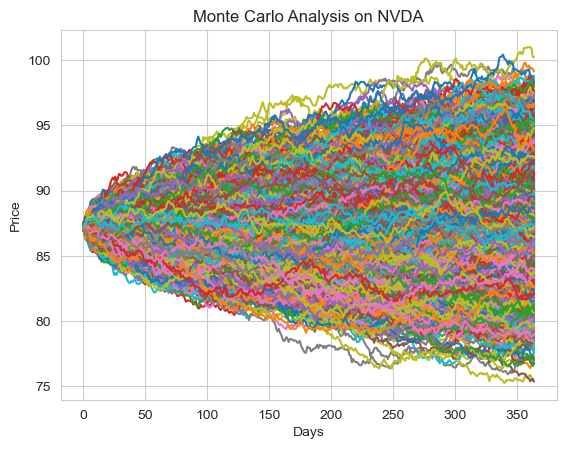

In [91]:
plt.show()

In [92]:
# this graph shows a year worth of random trial for NVDA's stock price

In [93]:
# I will create a histogram of the end-result to make it more understandable

# Note: Big guys in Wall Street do it million times of run and use much more complicated analysis.     :) you may get lucky <3

In [95]:
# set up run
runs = 100000
# create a new array 
simulations = np.zeros(runs)

# every run that point in the simulation is defined as the end price, we going to take this very last price point on the 365th day 

# and we gather an array of all these ending price points
for run in range(runs):
    simulations[run] = monte_carlo(start_price, days, mu, sigma)[days-1]

In [104]:
q = np.percentile(simulations, 1)
# plot histogram
plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s= f"Start price: ${start_price:.2f}" )
# Mean ending price
plt.figtext(0.6, 0.7, f"Mean final price: ${simulations.mean():.2f}" )

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, f"VaR(0.99): ${(start_price - q):.2f}" )

# Display 1% quantile
plt.figtext(0.15, 0.6, f"q(0.99): ${q:.2f}" )

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for NVDA Stock after %s days" % days, weight='bold');

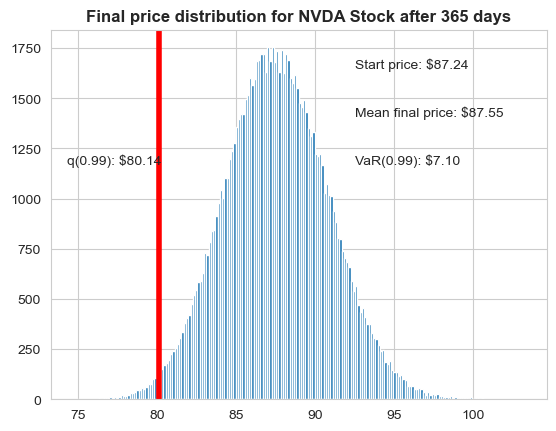

In [105]:
plt.show()